In [7]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

z_dim = 8
nb_hidden = 100

model_G = nn.Sequential(nn.Linear(z_dim, nb_hidden),
                        nn.ReLU(),
                        nn.Linear(nb_hidden, 2))

model_D = nn.Sequential(nn.Linear(2, nb_hidden),
                        nn.ReLU(),
                        nn.Linear(nb_hidden, 1),
                        nn.Sigmoid())

In [12]:
def train(real_examples, nb_epochs = 100, batch_size = 10, lr = 1e-3):
    optimizer_G = optim.Adam(model_G.parameters(), lr = lr)
    optimizer_D = optim.Adam(model_D.parameters(), lr = lr)

    for e in range(nb_epochs):
        print(f'training epoch {e}')
        for t, real_batch in enumerate(real_examples.split(batch_size)):
            z = real_batch.new(real_batch.size(0), z_dim).normal_()
            fake_batch = model_G(z)
    
            D_scores_on_real = model_D(real_batch)
            D_scores_on_fake = model_D(fake_batch)
    
            if t % 2 == 0:
                loss = (1 - D_scores_on_fake).log().mean()
                optimizer_G.zero_grad()
                loss.backward()
                optimizer_G.step()
            else:
                loss = -(1 - D_scores_on_fake).log().mean() - D_scores_on_real.log().mean()
                optimizer_D.zero_grad()
                loss.backward()
                optimizer_D.step()

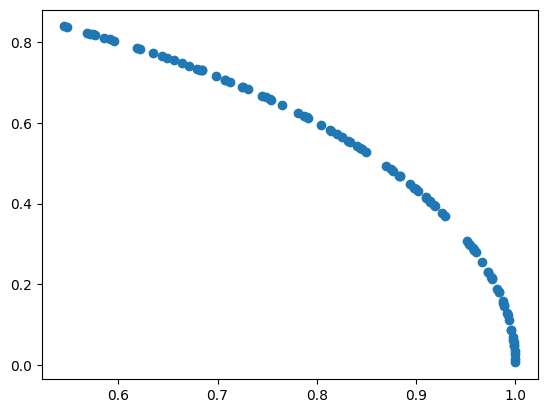

In [13]:
circle_examples = torch.zeros(100, 2)
r = torch.rand(100)

circle_examples[:,0] = torch.cos(r)
circle_examples[:,1] = torch.sin(r)

plt.scatter(circle_examples[:,0], circle_examples[:,1])

Streaming output truncated to the last 5000 lines.
training epoch 5000
training epoch 5001
training epoch 5002
training epoch 5003
training epoch 5004
training epoch 5005
training epoch 5006
training epoch 5007
training epoch 5008
training epoch 5009
training epoch 5010
training epoch 5011
training epoch 5012
training epoch 5013
training epoch 5014
training epoch 5015
training epoch 5016
training epoch 5017
training epoch 5018
training epoch 5019
training epoch 5020
training epoch 5021
training epoch 5022
training epoch 5023
training epoch 5024
training epoch 5025
training epoch 5026
training epoch 5027
training epoch 5028
training epoch 5029
training epoch 5030
training epoch 5031
training epoch 5032
training epoch 5033
training epoch 5034
training epoch 5035
training epoch 5036
training epoch 5037
training epoch 5038
training epoch 5039
training epoch 5040
training epoch 5041
training epoch 5042
training epoch 5043
training epoch 5044
training epoch 5045
training epoch 5046
training 

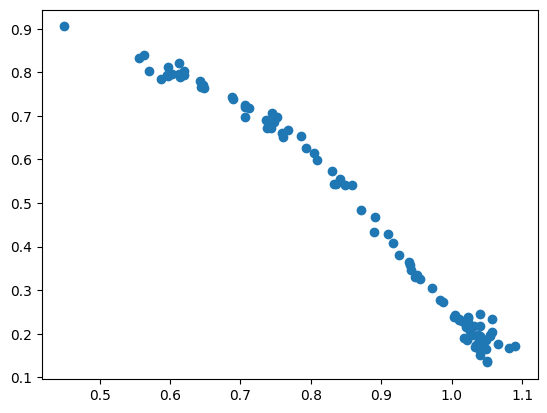

In [21]:
train(circle_examples, nb_epochs=10000)

z = circle_examples.new(100, z_dim).normal_()

fake_batch = model_G(z)

with torch.no_grad():
    plt.scatter(fake_batch[:,0], fake_batch[:,1])